In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes/description.pdf
/kaggle/input/diabetes/diabetic_data.csv


# Imposting Necessary Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd
pd.set_option('display.max_columns',None)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default='kaggle'
from plotly import tools
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from IPython.display import display

# Attributes Description :


**VARIABLE NAMES**: DESCRIPTION

* **Encounter ID**	Unique identifier of an encounter
* **Patient number**	Unique identifier of a patient
* **Race**	Values: Caucasian, Asian, African American, Hispanic, and other
* **Gender**	Values: male, female, and unknown/invalid
* **Age**	Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)
* **Weight**	Weight in pounds
* **Admission type**	Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available
* **Discharge disposition**	Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available
* **Admission source**	Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital
* **Time in hospital**	Integer number of days between admission and discharge
* **Payer code**	Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical
* **Medical specialty**	Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon
* **Number of lab procedures**	Number of lab tests performed during the encounter
* **Number of procedures** Numeric	Number of procedures (other than lab tests) performed during the encounter
* **Number of medications**	Number of distinct generic names administered during the encounter
* **Number of outpatient visits** Number of outpatient visits of the patient in the year preceding the encounter
* **Number of emergency visits**	Number of emergency visits of the patient in the year preceding the encounter
* **Number of inpatient visits**	Number of inpatient visits of the patient in the year preceding the encounter
* **Diagnosis 1**	The primary diagnosis (coded as first three digits of ICD9); 848 distinct values
* **Diagnosis 2**	Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values
* **Diagnosis 3** Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values
* **Number of diagnoses**	Number of diagnoses entered to the system 0%
* **Glucose serum test result**	Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured
* **A1c test result**	Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.
* **Change of medications**	Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”
* **Diabetes medications**	Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”
* 24 features for medications	For the generic names: **metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone**, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed
* **Readmitted**	Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission










In [3]:
# reading the dataset
df=pd.read_csv('/kaggle/input/diabetes/diabetic_data.csv')

In [4]:
def SevenSigma(df):
    """
    Print basic information and statistics of the dataset for better understanding.

    Parameters:
    - df (pd.DataFrame): The input dataset.

    Returns:
    None
    """
    # Display the shape of the dataset
    print(f"Shape of the dataset: {df.shape}")
    print("\n")

    # Display a sample of the dataset
    print("Sample from Dataset:")
    display(df.sample(5).style.background_gradient(cmap='Blues'))
    print("\n")

    # Display general information about the dataset
    print("Information of Dataset:")
    display(df.info())
    print("\n")

    # Display descriptive statistics for numeric features
    print("Description of Dataset for Numeric Features:")
    display(df.describe().T.style.background_gradient(cmap='Blues'))
    print("\n")

    # Display descriptive statistics for categorical features
    print("Description of Dataset for Categorical Features:")
    display(df.describe(exclude=np.number).T.style.background_gradient(cmap='Blues'))
    print("\n")

    # Display correlation heatmap for numeric features
    print("Correlation Heatmap:")
    sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdYlGn', linewidths=0.2)
    fig = plt.gcf()
    fig.set_size_inches(10, 10)
    plt.show()
    print("\n")

    # Display percentage of null values in the dataset
    print("Null Values in Dataset:")
    display(df.isnull().mean() * 100)
    print("\n")

    # Display duplicate rows in the dataset
    print("Duplicate Rows in Dataset:")
    display(df[df.duplicated()].style.background_gradient(cmap='Blues'))

Shape of the dataset: (101766, 50)


Sample from Dataset:


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
11299,46846662,25543143,Caucasian,Male,[70-80),?,1,1,17,5,?,Surgery-General,5,1,11,0,0,0,807,560,518,7,nan,nan,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
56791,162772158,114893811,AfricanAmerican,Female,[50-60),?,2,1,1,2,?,Nephrology,42,0,12,0,0,0,403,V63,584,9,nan,nan,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
68796,194632710,79397082,Caucasian,Female,[70-80),?,1,6,7,14,MC,Osteopath,33,0,23,0,0,1,485,491,250.02,9,nan,nan,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,>30
81119,250956186,96721506,Caucasian,Female,[70-80),?,6,1,17,5,?,Cardiology,46,3,18,0,0,0,414,411,250,7,nan,nan,No,No,Up,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
402,3725712,516384,Caucasian,Female,[50-60),?,6,25,7,3,?,Nephrology,85,0,11,0,0,0,276,584,403,9,nan,Norm,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30




Information of Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 

None



Description of Dataset for Numeric Features:


,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.000000,165201645.622978,102640295.983457,12522.000000,84961194.000000,152388987.000000,230270887.500000,443867222.000000
patient_nbr,101766.000000,54330400.694947,38696359.346534,135.000000,23413221.000000,45505143.000000,87545949.750000,189502619.000000
admission_type_id,101766.000000,2.024006,1.445403,1.000000,1.000000,1.000000,3.000000,8.000000
discharge_disposition_id,101766.000000,3.715642,5.280166,1.000000,1.000000,1.000000,4.000000,28.000000
admission_source_id,101766.000000,5.754437,4.064081,1.000000,1.000000,7.000000,7.000000,25.000000
time_in_hospital,101766.000000,4.395987,2.985108,1.000000,2.000000,4.000000,6.000000,14.000000
num_lab_procedures,101766.000000,43.095641,19.674362,1.000000,31.000000,44.000000,57.000000,132.000000
num_procedures,101766.000000,1.339730,1.705807,0.000000,0.000000,1.000000,2.000000,6.000000
num_medications,101766.000000,16.021844,8.127566,1.000000,10.000000,15.000000,20.000000,81.000000
number_outpatient,101766.000000,0.369357,1.267265,0.000000,0.000000,0.000000,0.000000,42.000000




Description of Dataset for Categorical Features:


,count,unique,top,freq
race,101766,6,Caucasian,76099
gender,101766,3,Female,54708
age,101766,10,[70-80),26068
weight,101766,10,?,98569
payer_code,101766,18,?,40256
medical_specialty,101766,73,?,49949
diag_1,101766,717,428,6862
diag_2,101766,749,276,6752
diag_3,101766,790,250,11555
max_glu_serum,5346,3,Norm,2597




Correlation Heatmap:


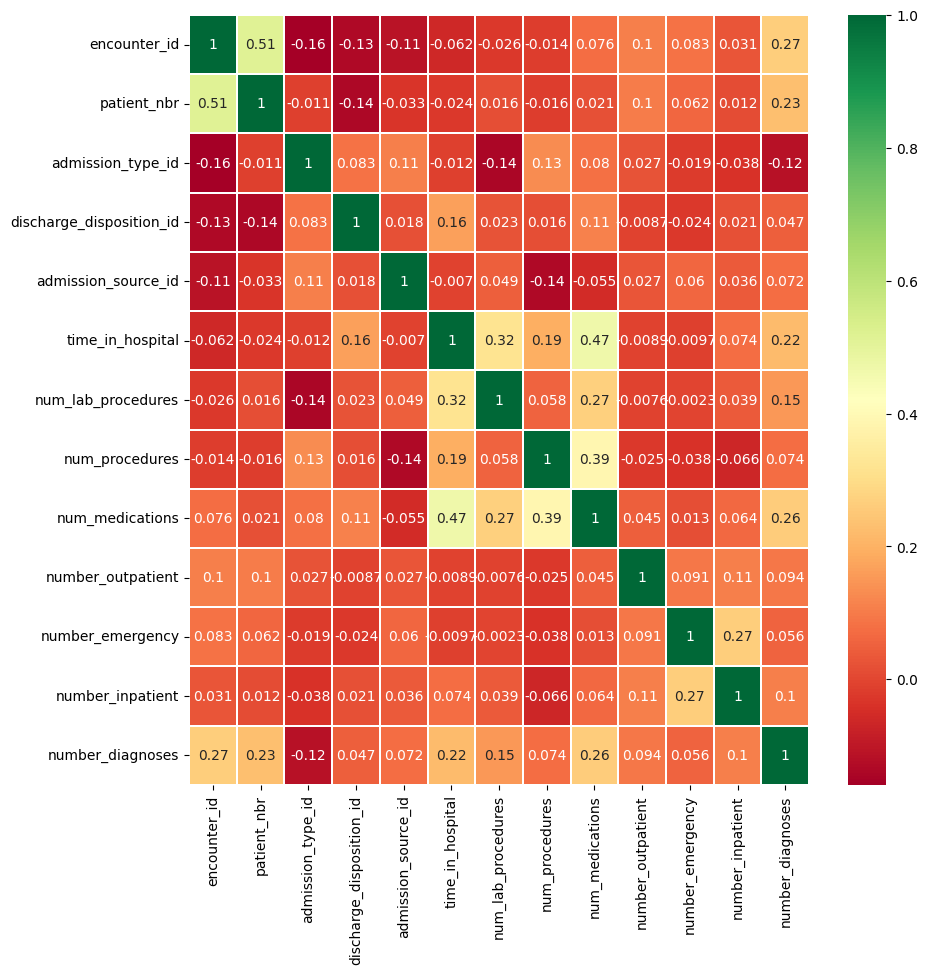



Null Values in Dataset:


encounter_id                 0.000000
patient_nbr                  0.000000
race                         0.000000
gender                       0.000000
age                          0.000000
weight                       0.000000
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                   0.000000
medical_specialty            0.000000
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.000000
diag_2                       0.000000
diag_3                       0.000000
number_diagnoses             0.000000
max_glu_serum               94.746772
A1Cresult                   83.277322
metformin                    0.000000
repaglinide                  0.000000
nateglinide 



Duplicate Rows in Dataset:


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted


In [5]:
SevenSigma(df)

# Let's Handle Missing Values

In [6]:
#max_glu_serum ,weight and A1Cresult has more than 85% null values so reoving it.
# examide and citoglipton has only one value so also removing it.
df.drop(columns=['max_glu_serum','A1Cresult','weight','citoglipton','examide','payer_code','medical_specialty'],inplace=True)

In [7]:
df['race'].value_counts()

race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

In [8]:
# replace any occurrences of '?' in the 'race' column with 'Other'.

df['race'] = df['race'].apply(lambda x: 'Other' if x == '?' else x)

In [9]:
# removing rows with unkown gender type
df.drop(index=[30506, 75551, 82573],inplace=True)

In [10]:
# removing null values from diag_1,2 and 3.
index=[]
index=list(df[df['diag_1']=='?'].index)
index.extend(df[df['diag_2']=='?'].index)
index.extend(df[df['diag_3']=='?'].index)

In [11]:
df.drop(index=index,inplace=True)

# Feature Engineering

In [12]:
# This function, replace_age_ranges, takes a feature (presumably containing age ranges) as input and 'values' represents corresponding numerical values assigned to each age range.

def replace_age_ranges(feature):
  age_ranges = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)','[60-70)', '[70-80)', '[80-90)', '[90-100)']
  values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
  
  # The function iterates through the age_ranges and replaces each occurrence in the 'feature' with the corresponding numerical value.
  for i, age_range in enumerate(age_ranges):
    feature = feature.replace(age_range, values[i])

  return feature


In [13]:
df['age']=replace_age_ranges(df['age'])

admission_type_id,description
1,Emergency
2,Urgent
3,Elective
4,Newborn
5,Not Available
6,NULL
7,Trauma Center
8,Not Mapped
,
discharge_disposition_id,description
1,Discharged to home
2,Discharged/transferred to another short term hospital
3,Discharged/transferred to SNF
4,Discharged/transferred to ICF
5,Discharged/transferred to another type of inpatient care institution
6,Discharged/transferred to home with home health service
7,Left AMA
8,Discharged/transferred to home under care of Home IV provider
9,Admitted as an inpatient to this hospital
10,Neonate discharged to another hospital for neonatal aftercare
11,Expired
12,Still patient or expected to return for outpatient services
13,Hospice / home
14,Hospice / medical facility
15,Discharged/transferred within this institution to Medicare approved swing bed
16,Discharged/transferred/referred another institution for outpatient services
17,Discharged/transferred/referred to this institution for outpatient services
18,NULL
19,"Expired at home. Medicaid only, hospice."
20,"Expired in a medical facility. Medicaid only, hospice."
21,"Expired, place unknown. Medicaid only, hospice."
22,Discharged/transferred to another rehab fac including rehab units of a hospital .
23,Discharged/transferred to a long term care hospital.
24,Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.
25,Not Mapped
26,Unknown/Invalid
30,Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere
27,Discharged/transferred to a federal health care facility.
28,Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital
29,Discharged/transferred to a Critical Access Hospital (CAH).
,
admission_source_id,description
1, Physician Referral
2,Clinic Referral
3,HMO Referral
4,Transfer from a hospital
5, Transfer from a Skilled Nursing Facility (SNF)
6, Transfer from another health care facility
7, Emergency Room
8, Court/Law Enforcement
9, Not Available
10, Transfer from critial access hospital
11,Normal Delivery
12, Premature Delivery
13, Sick Baby
14, Extramural Birth
15,Not Available
17,NULL
18, Transfer From Another Home Health Agency
19,Readmission to Same Home Health Agency
20, Not Mapped
21,Unknown/Invalid
22, Transfer from hospital inpt/same fac reslt in a sep claim
23, Born inside this hospital
24, Born outside this hospital
25, Transfer from Ambulatory Surgery Center
26,Transfer from Hospice


Based on the above mapping we have clusterd admission_type_id, discharge_disposition_id, admission_source_id that belong from simillar groups that helps in dimension reduction.

In [14]:
df['admission_type_id']=df['admission_type_id'].apply(lambda x : 5 if x in (6,8) else x)
df['admission_type_id']=df['admission_type_id'].apply(lambda x : 1 if x == 4 else 2 if x==7 else x )

In [15]:
#Discharged Home: 1, 6, 8
df['discharge_disposition_id']=df['discharge_disposition_id'].apply(lambda x : 1 if x in (6,8) else x)

#Uncategorized/Unknown: 18, 25, 26, 12
df['discharge_disposition_id']=df['discharge_disposition_id'].apply(lambda x : 18 if x in (25,26,12) else x)

#Expired:11, 19, 20, 21
df['discharge_disposition_id']=df['discharge_disposition_id'].apply(lambda x : 11 if x in (19,20,21) else x)

#Hospice:13, 14
df['discharge_disposition_id']=df['discharge_disposition_id'].apply(lambda x : 13 if x ==14 else x)

# Discharged/Transferred to Hospital: 2, 9, 10, 23, 27, 28, 29
df['discharge_disposition_id']=df['discharge_disposition_id'].apply(lambda x : 2 if x in ( 9, 10, 23, 27, 28, 29) else x)

#Discharged/Transferred to Care Facility: 3, 4, 5, 15, 24
df['discharge_disposition_id']=df['discharge_disposition_id'].apply(lambda x : 3 if x in ( 4, 5, 15, 24) else x)

#Discharged to Outpatient Services:16, 17
df['discharge_disposition_id']=df['discharge_disposition_id'].apply(lambda x : 16 if x ==17 else x)


In [16]:
# Unknown/Invalid: 9, 15, 17, 20, 21
df['admission_source_id']= df['admission_source_id'].apply(lambda x : 9 if x in (15, 17, 20, 21) else x)

# Physician/Clinic Referral:1, 2, 3
df['admission_source_id']= df['admission_source_id'].apply(lambda x : 1 if x in (2,3) else x)

#Transfer from Hospital: 4, 10, 22
df['admission_source_id']= df['admission_source_id'].apply(lambda x : 4 if x in (10,22) else x)


#Transfer from Facility:5, 6, 18, 19, 25, 26
df['admission_source_id']= df['admission_source_id'].apply(lambda x : 5 if x in (6, 18, 19, 25, 26) else x)

#Delivery:11, 12, 13, 14
df['admission_source_id']= df['admission_source_id'].apply(lambda x : 11 if x in (12, 13, 14) else x)


In [17]:
# all three diag features have more than 700 unqie we are grouping them based on ICD-9 codes
diag1_list=[]
diag2_list=[]
diag3_list=[]

In [18]:
# This function, diag_cluster, takes a column 'col' and a list 'diag_list' as inputs.
# It iterates through each value in the 'col' column of the DataFrame 'df' and assigns a cluster value based on certain conditions.
# The resulting cluster values are appended to the 'diag_list'.

def diag_cluster(col, diag_list):
    for x in df[col]:
        # If the value in the 'col' column contains 'V' or 'E', it is assigned a cluster value of 18.
        if 'V' in x or 'E' in x: 
            diag_list.append(18)
            continue
        # The following conditions assign cluster values based on specific ranges of float values.
        elif 1 <= float(x) <= 139:
            diag_list.append(1)
        elif 140 <= float(x) <= 239:
            diag_list.append(2)
        elif 240 <= float(x) <= 279:
            diag_list.append(3)
        elif 280 <= float(x) <= 289:
            diag_list.append(4)
        elif 290 <= float(x) <= 319:
            diag_list.append(5)
        elif 320 <= float(x) <= 389:
            diag_list.append(6)
        elif 390 <= float(x) <= 459:
            diag_list.append(7)
        elif 460 <= float(x) <= 519:
            diag_list.append(8)
        elif 520 <= float(x) <= 579:
            diag_list.append(9)
        elif 580 <= float(x) <= 629:
            diag_list.append(10)
        elif 630 <= float(x) <= 679:
            diag_list.append(11)
        elif 680 <= float(x) <= 709:
            diag_list.append(12)
        elif 710 <= float(x) <= 739:
            diag_list.append(13)
        elif 740 <= float(x) <= 759:
            diag_list.append(14)
        elif 760 <= float(x) <= 779:
            diag_list.append(15)
        elif 780 <= float(x) <= 799:
            diag_list.append(16)
        elif 800 <= float(x) <= 999:
            diag_list.append(17)


In [19]:
diag_cluster('diag_1',diag1_list)
diag_cluster('diag_2',diag2_list)
diag_cluster('diag_3',diag3_list)

In [20]:
df['diag_1']=diag1_list
df['diag_2']=diag2_list
df['diag_3']=diag3_list

In [21]:
df['change']=df['change'].apply(lambda x: 'Yes' if x=='Ch' else x)

# Encoding Categorical Features

In [22]:
# Iterating through each medicine column and converting 'No' to 0 and other values to 1.

medicines = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']

for col in medicines:
    df[col] = df[col].apply(lambda x: 0 if x == 'No' else 1)

In [23]:
df['gender']=df['change'].apply(lambda x: 0 if x=='Female' else 1)

In [24]:
df['change']=df['change'].apply(lambda x : 0 if x=='No' else 1)
df['diabetesMed']=df['diabetesMed'].apply(lambda x : 0 if x=='No' else 1)

In [25]:
df['readmitted']=df['readmitted'].apply(lambda x : 1 if x=='<30' else 0)

In [26]:
# we have found that there are many entries of some users in dataset it will make our ML algorithm biased so removing them.
df.drop_duplicates(subset='patient_nbr',keep='first',inplace=True)

In [27]:
df.drop(columns=['encounter_id','patient_nbr'],inplace=True)

In [28]:
# used label encoder for race feature.
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['race']=encoder.fit_transform(df['race'])

# Model Building

In [29]:
'''X=df.drop(columns='readmitted')
y=df['readmitted']'''

"X=df.drop(columns='readmitted')\ny=df['readmitted']"

In [30]:
X=df[['num_lab_procedures', 'num_medications', 'diag_3', 'diag_1', 'age',
       'diag_2', 'time_in_hospital', 'number_diagnoses', 'num_procedures',
       'admission_source_id', 'race', 'admission_type_id',
       'discharge_disposition_id', 'insulin', 'diabetesMed', 'change',
       'metformin', 'glipizide', 'number_outpatient', 'glyburide',
       'rosiglitazone', 'pioglitazone', 'number_inpatient', 'glimepiride',
       'number_emergency']]
y=df['readmitted']

In [31]:
%%time
# dataset is higly imbalanced so using SMOTE method oversampling the minority class

from collections import Counter  

from imblearn.over_sampling import SMOTE

sm=SMOTE(sampling_strategy='minority',random_state=42,n_jobs=-1)

X_res, y_res = sm.fit_resample(X, y)

CPU times: user 727 ms, sys: 441 ms, total: 1.17 s
Wall time: 968 ms


In [32]:
'''from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
'''

'from sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)\n'

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=42)

In [34]:
#  hyperparameters tunning using optuna
from sklearn.metrics import f1_score
import optuna
from optuna.samplers import TPESampler
import catboost
def objective(trial):
    model = catboost.CatBoostClassifier(
        iterations=trial.suggest_int("iterations", 100, 1000),
        learning_rate=trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
        depth=trial.suggest_int("depth", 4, 10),
        boosting_type= trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        bootstrap_type=trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "MVS"]
        ),
        l2_leaf_reg=trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log=True),
        #bootstrap_type=trial.suggest_categorical("bootstrap_type", ["Bayesian"]),
        random_strength=trial.suggest_float("random_strength", 1e-8, 10.0, log=True),
        bagging_temperature=trial.suggest_float("bagging_temperature", 0.0, 10.0),
        od_type=trial.suggest_categorical("od_type", ["IncToDec", "Iter"]),
        od_wait=trial.suggest_int("od_wait", 10, 50),
        #max_leaves=trial.suggest_int("max_leaves",15,40),
        min_data_in_leaf=trial.suggest_int("min_data_in_leaf",51,120),
        loss_function='Logloss',
        eval_metric='Logloss',
        task_type='GPU',
        verbose=False,
    )
    model.fit(X_train, y_train,eval_set=[(X_test,y_test)])
    y_pred = model.predict(X_test)
    return f1_score(y_test, y_pred,average='micro')

In [35]:
'''%%time

optuna.logging.set_verbosity(optuna.logging.WARNING)


sampler = TPESampler(seed=1)
study = optuna.create_study(study_name="catboost", direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=31)'''

'%%time\n\noptuna.logging.set_verbosity(optuna.logging.WARNING)\n\n\nsampler = TPESampler(seed=1)\nstudy = optuna.create_study(study_name="catboost", direction="maximize", sampler=sampler)\nstudy.optimize(objective, n_trials=31)'

In [36]:
'''print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))'''

'print("Number of finished trials: ", len(study.trials))\nprint("Best trial:")\ntrial = study.best_trial\nprint("  Value: ", trial.value)\nprint("  Params: ")\nfor key, value in trial.params.items():\n    print("    {}: {}".format(key, value))'

In [37]:
'''fig = optuna.visualization.plot_param_importances(study)
fig.show()'''

'fig = optuna.visualization.plot_param_importances(study)\nfig.show()'

In [38]:
'''study.best_trial'''

'study.best_trial'

In [39]:
#params={'iterations': 513, 'learning_rate': 0.0397842000536864, 'depth': 7, 'l2_leaf_reg': 0.05206518524157017, 'bootstrap_type': 'Bayesian', 'random_strength': 4.6530700573768906e-07, 'bagging_temperature': 0.1394386439385641, 'od_type': 'IncToDec', 'od_wait': 30}
#params={'iterations': 810, 'learning_rate': 0.02656293600669053, 'depth': 5, 'l2_leaf_reg': 0.28259770270974677, 'bootstrap_type': 'Bayesian', 'random_strength': 3.002070542128706e-05, 'bagging_temperature': 0.7065794059168207, 'od_type': 'IncToDec', 'od_wait': 28}
#params={'iterations': 471, 'learning_rate': 0.0766629782215195, 'depth': 8, 'l2_leaf_reg': 0.0009941919255431284, 'bootstrap_type': 'Bayesian', 'random_strength': 1.0067486415831434e-08, 'bagging_temperature': 0.4183095348176672, 'od_type': 'Iter', 'od_wait': 45}
#params={'iterations': 226, 'learning_rate': 0.002490020818620744, 'depth': 9, 'l2_leaf_reg': 48.15215820395775, 'bootstrap_type': 'Bayesian', 'random_strength': 6.6193844201488494e-06, 'bagging_temperature': 6.923226156693141, 'od_type': 'Iter', 'od_wait': 13}
# over sampled full features
#params={'iterations': 899, 'learning_rate': 0.06966733523156289, 'depth': 9, 'l2_leaf_reg': 8.071917904799597e-08, 'bootstrap_type': 'Bayesian', 'random_strength': 0.001980689035613274, 'bagging_temperature': 5.000998021136371, 'od_type': 'IncToDec', 'od_wait': 17}
# over sampled 
params={'iterations': 881, 'learning_rate': 0.01961057467284439, 'depth': 10, 'l2_leaf_reg': 0.0026174150623770134, 'bootstrap_type': 'Bayesian', 'random_strength': 2.191236365450965e-06, 'bagging_temperature': 5.6475486877966965, 'od_type': 'IncToDec', 'od_wait': 42}

#params={'iterations': 813, 'learning_rate': 0.09425433483853037, 'depth': 10, 'l2_leaf_reg': 0.00025117779012403147, 'bootstrap_type': 'Bayesian', 'random_strength': 5.2681683837260795, 'bagging_temperature': 9.466232535470276, 'od_type': 'Iter', 'od_wait': 22, 'min_data_in_leaf': 83}

#params={'iterations': 203, 'learning_rate': 0.0792462129989754, 'depth': 7, 'l2_leaf_reg': 0.006079895907372734, 'bootstrap_type': 'Bayesian', 'random_strength': 4.712281485061178e-05, 'bagging_temperature': 2.3702698024302773, 'od_type': 'IncToDec', 'od_wait': 10, 'min_data_in_leaf': 94}

#params={'iterations': 505, 'learning_rate': 0.02782150749600363, 'depth': 4, 'l2_leaf_reg': 0.134465926211342, 'bootstrap_type': 'Bayesian', 'random_strength': 1.0352167279068568e-07, 'bagging_temperature': 1.043841134968342, 'od_type': 'Iter', 'od_wait': 29, 'min_data_in_leaf': 88}


#params={'iterations': 475, 'learning_rate': 0.027583475549166746, 'depth': 4, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS', 'l2_leaf_reg': 2.855007611568483e-05, 'random_strength': 3.72312200494449e-05, 'bagging_temperature': 5.3881673400335695, 'od_type': 'Iter', 'od_wait': 18, 'min_data_in_leaf': 112}

In [40]:
model=catboost.CatBoostClassifier(**params,verbose=False)

In [41]:
model.fit(X_train,y_train)

In [42]:
probs=model.predict_proba(X_test)

In [43]:
y_pred=model.predict(X_test)

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88     16200
           1       0.86      0.90      0.88     15882

    accuracy                           0.88     32082
   macro avg       0.88      0.88      0.88     32082
weighted avg       0.88      0.88      0.88     32082

